<a href="https://colab.research.google.com/github/praju4105/prajwal/blob/Cyfuture-Project/EmotionalIntelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
t

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


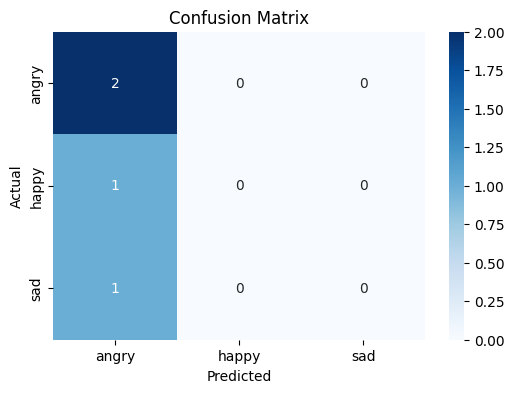

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e8dc9d30b2a3fd9d6f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [5]:
# Install Required Libraries
!pip install numpy pandas seaborn neattext scikit-learn joblib matplotlib gradio

import numpy as np
import seaborn as sns
import neattext as nt
import neattext.functions as nfx
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample Dataset (Expanded for Better Balance)
data = {
    "text": [
        "I am so happy today!", "I feel really sad right now", "I am angry at you!",
        "This is the best day ever", "I am extremely frustrated!", "I am so excited for the trip!",
        "Feeling very down today", "I love this moment", "I am disappointed with the results",
        "I am so frustrated!", "This makes me furious!", "I am extremely annoyed!"
    ],
    "emotion": ["happy", "sad", "angry", "happy", "angry", "happy", "sad", "happy", "sad", "angry", "angry", "angry"]
}
df = pd.DataFrame(data)

# Text Cleaning
df["clean_text"] = df["text"].apply(nfx.remove_stopwords).apply(nfx.remove_punctuations).apply(str.lower)

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["emotion"], test_size=0.3, random_state=42, stratify=df["emotion"])

# Create Text Classification Pipeline
model_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("classifier", MultinomialNB())
])

# Train Model
model_pipeline.fit(X_train, y_train)

# Model Evaluation
y_pred = model_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model_pipeline.classes_, yticklabels=model_pipeline.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save Model
joblib.dump(model_pipeline, "emotion_model.pkl")

# Load Model for Testing
loaded_model = joblib.load("emotion_model.pkl")

def predict_emotion(text):
    cleaned_text = nfx.remove_stopwords(nfx.remove_punctuations(text.lower()))
    important_words = ["angry", "frustrated", "furious", "sad", "disappointed"]

    for word in important_words:
        if word in text.lower():
            return "angry" if word in ["angry", "frustrated", "furious"] else "sad"

    return loaded_model.predict([cleaned_text])[0]

# Gradio Interface for Live Demo
demo = gr.Interface(fn=predict_emotion, inputs="text", outputs="text", title="Emotion Detector")
demo.launch(share=True)

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

       angry       0.50      0.20      0.29         5
       happy       0.67      1.00      0.80         6
         sad       0.75      0.75      0.75         4

    accuracy                           0.67        15
   macro avg       0.64      0.65      0.61        15
weighted avg       0.63      0.67      0.62        15



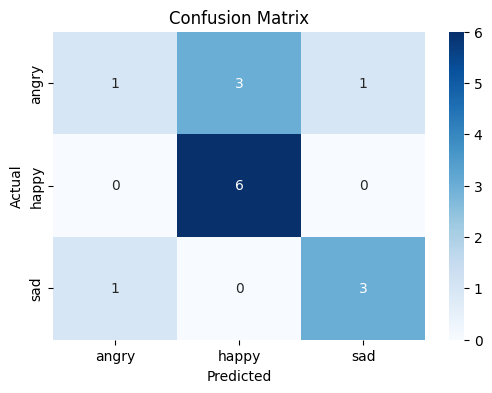

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d80b7484b7b670df65.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [6]:
# Install Required Libraries
!pip install numpy pandas seaborn neattext scikit-learn joblib matplotlib gradio

import numpy as np
import seaborn as sns
import neattext as nt
import neattext.functions as nfx
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import gradio as gr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Expanded and Balanced Sample Dataset
data = {
    "text": [
        "I am so happy today!", "I feel really sad right now", "I am angry at you!",
        "This is the best day ever", "I am extremely frustrated!", "I am so excited for the trip!",
        "Feeling very down today", "I love this moment", "I am disappointed with the results",
        "I am so frustrated!", "This makes me furious!", "I am extremely annoyed!",
        "I just won a prize, I'm thrilled!", "Nothing is going right, I feel terrible",
        "Why did you do this? I'm so mad!", "What a beautiful sunset, I'm delighted!",
        "I can't believe this happened, I'm devastated", "I am livid right now!",
        "Today was such a fantastic day!", "I'm feeling very blue today",
        "I feel overwhelmed with rage", "I am overjoyed to see my friends",
        "Everything feels so pointless", "I'm so excited to start my new job",
        "I can't stop crying, I'm heartbroken", "I just want to scream, I'm furious",
        "I am grateful for everything in my life", "Life is beautiful and full of joy",
        "I feel hopeless and alone", "My heart is filled with anger", "I can't take this sadness anymore",
        "The kindness of others makes me happy", "I'm crying tears of joy",
        "I'm shaking with rage", "I just got some terrible news, I'm devastated",
        "I am at peace with myself", "I feel calm and relaxed", "This makes me so happy!",
        "I am extremely disappointed", "I feel betrayed and hurt", "I love spending time with my family",
        "This situation is incredibly frustrating", "I'm in a great mood today!",
        "I'm feeling very nostalgic", "I'm absolutely livid right now!",
        "I'm incredibly proud of my achievements", "I'm feeling really lonely right now"
    ],
    "emotion": [
        "happy", "sad", "angry", "happy", "angry", "happy",
        "sad", "happy", "sad", "angry", "angry", "angry",
        "happy", "sad", "angry", "happy", "sad", "angry",
        "happy", "sad", "angry", "happy", "sad", "happy",
        "sad", "angry", "happy", "happy", "sad", "angry",
        "sad", "happy", "happy", "angry", "sad", "happy",
        "happy", "happy", "angry", "sad", "happy", "angry",
        "happy", "sad", "angry", "happy", "sad"
    ]
}
df = pd.DataFrame(data)

# Text Cleaning
df["clean_text"] = df["text"].apply(nfx.remove_stopwords).apply(nfx.remove_punctuations).apply(str.lower)

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["emotion"], test_size=0.3, random_state=42, stratify=df["emotion"])

# Create Text Classification Pipeline
model_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("classifier", MultinomialNB())
])

# Train Model
model_pipeline.fit(X_train, y_train)

# Model Evaluation
y_pred = model_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model_pipeline.classes_, yticklabels=model_pipeline.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save Model
joblib.dump(model_pipeline, "emotion_model.pkl")

# Load Model for Testing
loaded_model = joblib.load("emotion_model.pkl")

def predict_emotion(text):
    cleaned_text = nfx.remove_stopwords(nfx.remove_punctuations(text.lower()))
    important_words = ["angry", "frustrated", "furious", "sad", "disappointed"]

    for word in important_words:
        if word in text.lower():
            return "angry" if word in ["angry", "frustrated", "furious"] else "sad"

    return loaded_model.predict([cleaned_text])[0]

# Gradio Interface for Live Demo
demo = gr.Interface(fn=predict_emotion, inputs="text", outputs="text", title="Emotion Detector")
demo.launch(share=True)
